In [1]:
# Importing necessary packages 
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('car data.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape

(4340, 8)

In [4]:
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())
print(df['fuel'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [5]:
# Checking Null Values  or missing values 

df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

So, there is no any count so no null values.

In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [7]:
final_dataset = df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']]

In [8]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [9]:
final_dataset['current_year']=2020
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2020
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2020
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2020
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2020
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2020


In [10]:
final_dataset['no_year']=final_dataset['current_year']-final_dataset['year']
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2020,13
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2020,13
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2020,8
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2020,3
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2020,6


- Final_dataset.drop(['year'],axis=1,inplace=True) # to make operation happen in permannet so inplace = True
- Executed First but, post executing it getting error so commented out.

In [11]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2020,13
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2020,13
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2020,8
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2020,3
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2020,6


In [12]:
final_dataset.drop(['current_year'],axis=1,inplace=True)
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,3
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6


In [13]:
final_dataset.drop(['year'],axis=1,inplace=True)

In [14]:
final_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,60000,70000,Petrol,Individual,Manual,First Owner,13
1,135000,50000,Petrol,Individual,Manual,First Owner,13
2,600000,100000,Diesel,Individual,Manual,First Owner,8
3,250000,46000,Petrol,Individual,Manual,First Owner,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,6


> We're dropping the first coulum so not to get in dummy variable trap. And also avoiding the extra computation.
> drop_first = True 

In [15]:
final_dataset=pd.get_dummies(final_dataset, drop_first=True)  

In [16]:
final_dataset.head()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0


* As you can see due to drop_first = True, we didn't get the Fuel Type 'fuel_CNG'
* These are the initial Fuel Categories - 'Petrol' 'Diesel' 'CNG' 'LPG' 'Electric'

In [17]:
final_dataset.corr()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
no_year,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


* After seeing the different correaltion values with different feature, we can remove the features whcih are Highly correlated to each other can be removed. But in our case there is very less features avalaibles. So we're not removing any features. :) 
Also we can see there are some features which are positively correlated ans some are negatively correlated.

In [18]:
# Seeing the Correlation in visualized manner 
import seaborn as sns 
sns.pairplot(final_dataset)

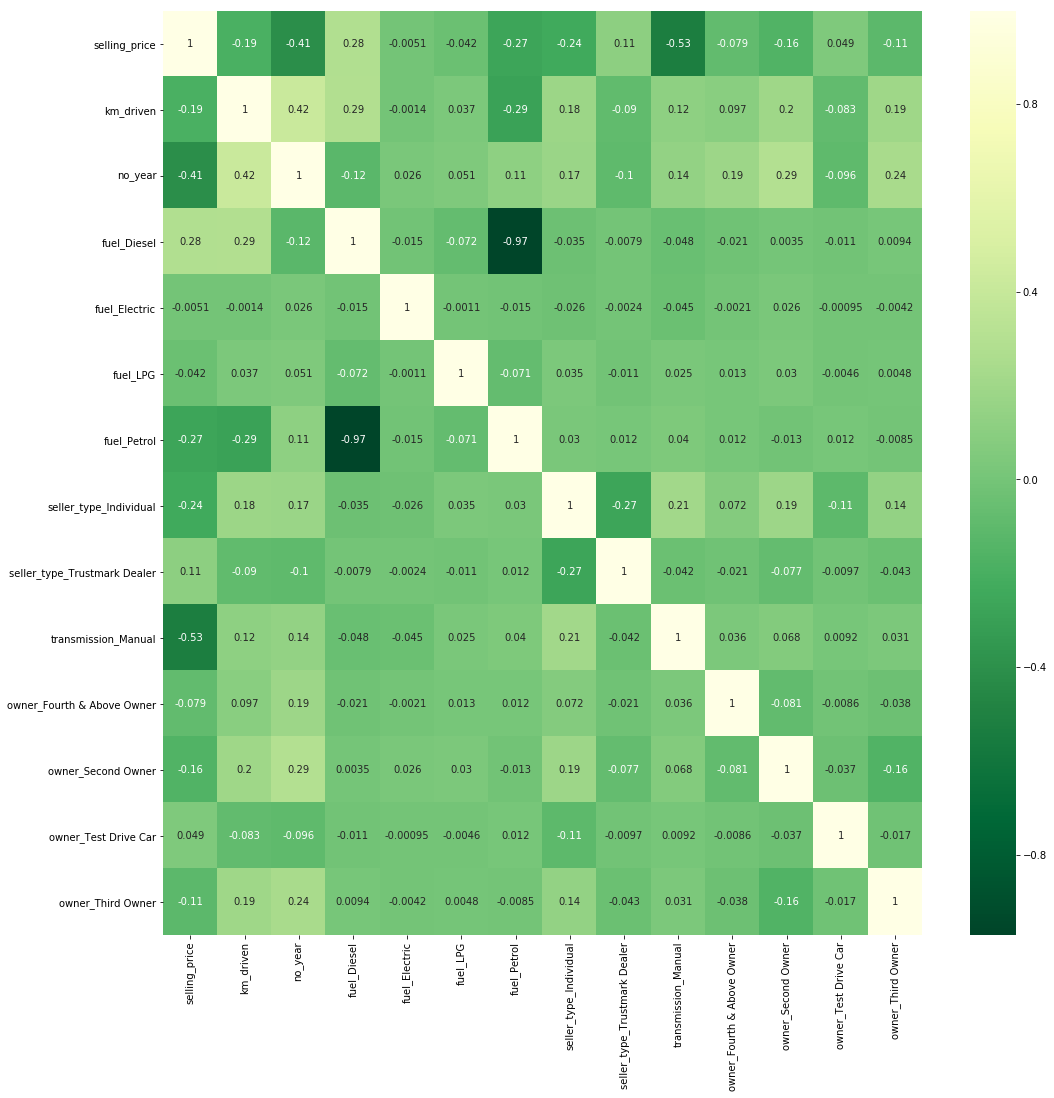

In [19]:
import matplotlib.pyplot as plt 
%matplotlib inline

car_corr = final_dataset.corr()
top_corr_features = car_corr.index
plt.figure(figsize=(17, 17))
# plot heat map
g = sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="YlGn_r")

If correlation is < 0.8 or > 0.8 you will be able to drop the features as both features are same 

In [20]:
final_dataset.head()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [21]:
# Setting up the variables for the model building (Independent and Dependent features)
X=final_dataset.iloc[:,1:]  # Taking all the features excluding zeroth index feature i.e. selling price
y=final_dataset.iloc[:,0]  # Dependent Feature - Selling Price 
print('Independent Features')
print(X)
print('\n Dependent Variable')
print(y)

Independent Features
      km_driven  no_year  fuel_Diesel  fuel_Electric  fuel_LPG  fuel_Petrol  \
0         70000       13            0              0         0            1   
1         50000       13            0              0         0            1   
2        100000        8            1              0         0            0   
3         46000        3            0              0         0            1   
4        141000        6            1              0         0            0   
...         ...      ...          ...            ...       ...          ...   
4335      80000        6            1              0         0            0   
4336      80000        6            1              0         0            0   
4337      83000       11            0              0         0            1   
4338      90000        4            1              0         0            0   
4339      40000        4            0              0         0            1   

      seller_type_Individual  

In [22]:
X.head()

,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [23]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [25]:
# Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X,y)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [26]:
print(etr.feature_importances_)

[2.52705034e-01 2.42715656e-01 1.29396394e-01 1.56044448e-05
 2.57079948e-05 1.74139929e-04 4.37977070e-02 9.17492347e-03
 2.92866495e-01 8.16437782e-04 2.27897022e-02 2.74306954e-04
 5.24789036e-03]


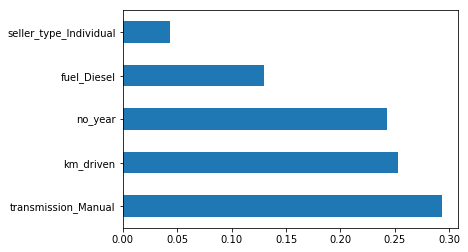

In [28]:
# plot graph of features importances for better visualization
feat_importance = pd.Series(etr.feature_importances_, index=X.columns)
feat_importance.nlargest(5).plot(kind='barh')   # taking top 5 importanant feature just for showing 
plt.show()

In [29]:
# Splitting the data for training and testing purpose
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)  

In [30]:
X_train.shape

(3472, 13)

In [31]:
# Using Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# Predictions 
predictions = lr_model.predict(X_test)
predictions

array([ 1.56925534e+06,  5.67478104e+05,  6.26745066e+05,  4.80369602e+05,
        5.82131641e+05,  5.38269965e+05,  4.70018834e+05,  8.16696319e+05,
        2.98865473e+05,  3.36622884e+05,  1.28419234e+06,  4.06310485e+05,
        1.60707960e+05,  2.78147522e+05,  1.00174319e+04,  5.31210103e+05,
        5.51531103e+05,  5.25819601e+05,  8.80916871e+05,  4.49794865e+05,
        5.54849016e+05,  5.66457391e+04,  4.87987174e+05,  1.43997560e+06,
        1.36533332e+06,  4.97724346e+04,  5.02333286e+05,  5.90808386e+05,
        6.38693965e+05,  4.22593954e+05,  6.24528335e+05,  3.69864313e+05,
        2.61292717e+05,  7.30892212e+05,  2.89666186e+05,  5.37586666e+05,
        5.10745122e+05,  2.97106019e+05,  6.93131044e+04,  7.48461595e+05,
        1.03487888e+05,  7.01987589e+05,  3.23023551e+05,  4.34765454e+05,
        1.47486641e+06,  8.96428939e+05, -1.42207178e+05,  5.11317456e+05,
        5.20301626e+05,  2.70276887e+05,  5.67756969e+05,  6.52144419e+05,
        1.03424390e+05,  

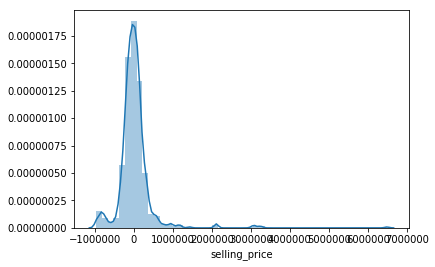

In [33]:
# We're doing actual values - predicted values to check what our algorithm is predicting.
sns.distplot(y_test-predictions)

* As you can see we're getting the Normal Distribution Curve, which indicates that our model is giving very good accuracy.
* There is very little difference in between the predicted and actual values so we're getting almost nearly normal distribution in above graph. 

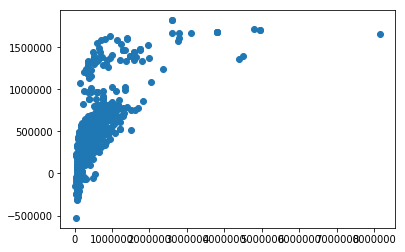

In [34]:
plt.scatter(y_test, predictions)

In [39]:
# Creating a Pickle file of a builded model.
# Open a file, where you want to store the data
import pickle 
file = open('Linear_Regression_Model.pkl', 'wb')

# Dump information to that file
pickle.dump(lr_model, file)

Check post executing the above pickle formation code, one pickle file is get created in the working folder.